STOCK MARKET PREDICTION AND FORRCASTING USING STACKED LTSM


In [17]:
import pandas as pd

In [18]:
df=pd.read_csv('NSE-TATAGLOBAL.csv')

In [20]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df1=df.reset_index()['Close']

In [14]:
df1.shape

(2035,)

In [15]:
df1[2035:]

Series([], Name: Close, dtype: float64)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


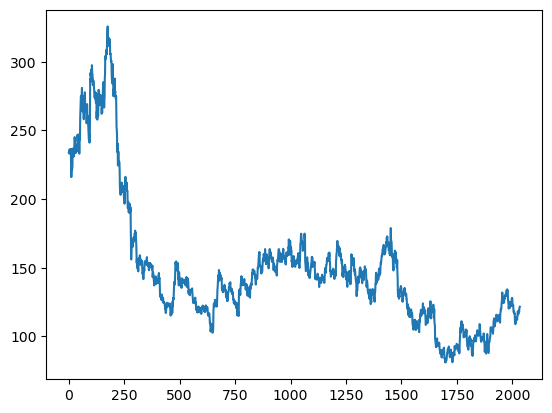

In [24]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSM are sensitive to the scale of the data. so we apply MinMax scaler

In [25]:
import numpy as np